In [1]:
#import all this in the python file
import pandas as pd
import os
import sys
import nltk
import tensorflow as tf
import matplotlib

import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

#tokenise all the words with the help of a tokeniser
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer() #num_words is the tokeniser that fits the number of words

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D #find out how come they using different types of drop outs
from tensorflow.keras.layers import Embedding
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [39]:
#call this function
def predict_sentiment(text):#note that 1 denotes positive and 0 denotes negative
    model = keras.models.load_model('model')
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    #print(prediction)
    if prediction ==1:
        print("Predicted label: Good sentiment")
        return 'good'
    else:
        print("Predicted label: Bad sentiment")
        return 'bad'

In [38]:
predict_sentiment("terrific")

Predicted label: Bad sentiment


In [4]:
ps = PorterStemmer()

In [5]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True, #restoring the best weights
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)

In [6]:
chunks = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = 100)
reviews = pd.concat([c for c in chunks])
df = reviews
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
8635398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
8635399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
8635400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
8635401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [7]:
#labelling the positive and negative values
row_indexes_positive=df[df['stars']>=4].index 
df.loc[row_indexes_positive,'sentiment']=1 #can think about whether we should just encode 1 and 0 here
row_indexes_positive=df[df['stars']>=4]

row_indexes_negative=df[df['stars']<4].index 
df.loc[row_indexes_negative,'sentiment']=0
row_indexes_negative=df[df['stars']<4]

In [8]:
negWords = []
n = open("negativeWords.txt", "r")
for line in n:
    negWords.append(line.strip())
negDf = pd.DataFrame(negWords)
negDf.insert(1,"sentiment",0)
negDf.columns = ['text', 'sentiment']
negDf

,text,sentiment
0,2-faced,0
1,2-faces,0
2,abnormal,0
3,abolish,0
4,abominable,0
...,...,...
4778,zaps,0
4779,zealot,0
4780,zealous,0
4781,zealously,0


In [9]:
posDict = []
n = open("positiveWords.txt", "r")
for line in n:
    posDict.append(line.strip())
posDf = pd.DataFrame(posDict)
posDf.insert(1,"sentiment",1)
posDf.columns = ['text', 'sentiment']
posDf

,text,sentiment
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [10]:
sample10000negative = row_indexes_negative.sample(n=10000) #maybe can try bigger numbers later
sample10000positive = row_indexes_positive.sample(n=10000)
review_df = pd.concat([sample10000negative, sample10000positive], axis=0)
review_df = review_df.sample(frac = 1) #shuffling the positive and negative sentiments
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
7731659,rxNA4pUaU-pbUcO1UtwWcA,YAcDGI4oqOAkAwXiYSX2SQ,dnybLydYkgR1LdUr5Q0DIw,4,0,0,0,As everyone knows these plates are HUGE. Even ...,2020-08-13 20:29:02,1.0
3339187,h7B0b3YgC7Dgl2spLQLvUQ,k5K9w7fxFMvgjln1tuQAQA,Mvr426COJ0GKwPChBjSr-Q,3,0,0,0,My husband and I decided to give the place a t...,2020-01-11 21:29:10,0.0
998004,2aveRaNKRGHJPvKG7gVu1A,xGCFK5kHF9Y-PheaIvE6AA,eOykZasG51-pR23M1ckQNg,2,1,1,0,Ok food quality and taste. Nothing to write h...,2011-01-12 14:01:09,0.0
3531852,vGX5_HdtKWJ1-SMK_lcozg,CP0HHZCo9gXuNGzZ0Glkiw,DLqGT1d8KYYoFmfaexkCOg,3,1,0,0,The store has been remodeled within the last y...,2014-10-29 16:39:40,0.0
5791235,ZuCQWH0l2PMo2uNa5FPVJw,IYHAvYS4eIUd4ABuAPDeRQ,J9JKzsf8QqEt9m0hKoYE1w,1,4,0,0,I have only been here a little over a month. T...,2019-07-23 00:47:32,0.0


In [11]:
review_df = review_df[['text','sentiment']]
review_df = pd.concat([review_df, negDf,posDf], axis=0)
review_df = review_df.sample(frac = 1)
review_df.head()
review_df.dropna() #dropping the reviews that do not have a sentiment
review_df.head()

,text,sentiment
1203,disintegrate,0.0
4231809,GET.THE.BRUSSELSPROUTS.\nI got Brussels sprout...,1.0
3436828,Been here two times now and the food been real...,1.0
6569031,I am from Upstate NY and have dined at Delmoni...,0.0
444921,The sirloin was very good! Same with the veal ...,1.0


In [12]:
#think about whether we want to take the neutral and drop or just dont classify as neutral
valuecount = review_df[['sentiment']].value_counts()
print(valuecount)


sentiment
0.0          14783
1.0          12006
dtype: int64


In [13]:
#convert the categorical data into numeric data
review_df.head()

,text,sentiment
1203,disintegrate,0.0
4231809,GET.THE.BRUSSELSPROUTS.\nI got Brussels sprout...,1.0
3436828,Been here two times now and the food been real...,1.0
6569031,I am from Upstate NY and have dined at Delmoni...,0.0
444921,The sirloin was very good! Same with the veal ...,1.0


In [14]:
p = []
for i in string.punctuation:
    p.append(i)
p

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [22]:
#retrieve all the data from the dataset
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
meaninglessTokens = ["...","``","\"","--","\'"]

preStem = []

for i in range(len(review_df["text"].values)):
        text = str(review_df['text'].iloc[i]).lower()
        word = word_tokenize(text)
        if word not in p:
            if word not in sw:
                if word not in meaninglessTokens: 
                    preStem.extend(word)
vocab_size = len(preStem)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
tweet = review_df["text"].values
vocab_size

2721100

In [24]:
vocab = tokenizer.fit_on_texts(tweet)
print(tokenizer.fit_on_texts(tweet))

None


In [25]:
#replace the words with their assigned numbers using the text_to_sequence method
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [26]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [27]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200)) #i think in the embedding layer it changed 1 to 0 and 0 to 1
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           87075200  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 87,091,851
Trainable params: 87,091,851
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
sentiment_label = review_df["sentiment"].factorize()
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32, callbacks=[callback]) #change the learning rate and reduce the number of epochs later
model.save('model')

Epoch 1/5
670/670 [==============================] - 759s 1s/step - loss: 0.5282 - accuracy: 0.7493 - val_loss: 0.3735 - val_accuracy: 0.8395
Epoch 2/5
670/670 [==============================] - 766s 1s/step - loss: 0.2841 - accuracy: 0.8906 - val_loss: 0.4375 - val_accuracy: 0.8395
Epoch 3/5
670/670 [==============================] - 752s 1s/step - loss: 0.1890 - accuracy: 0.9301 - val_loss: 0.4803 - val_accuracy: 0.8343
Epoch 4/5
670/670 [==============================] - 759s 1s/step - loss: 0.1543 - accuracy: 0.9437 - val_loss: 0.5136 - val_accuracy: 0.8346
Epoch 5/5
670/670 [==============================] - 746s 1s/step - loss: 0.1404 - accuracy: 0.9486 - val_loss: 0.6137 - val_accuracy: 0.8279
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets


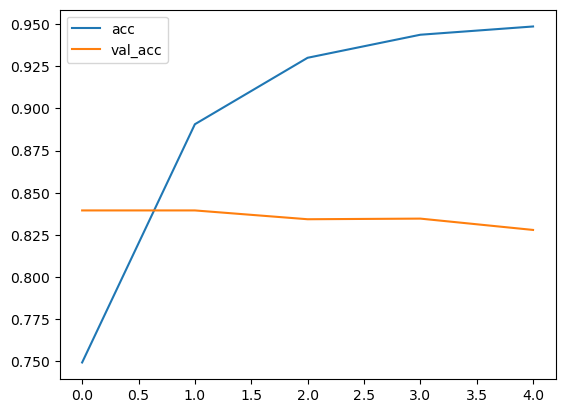

In [31]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

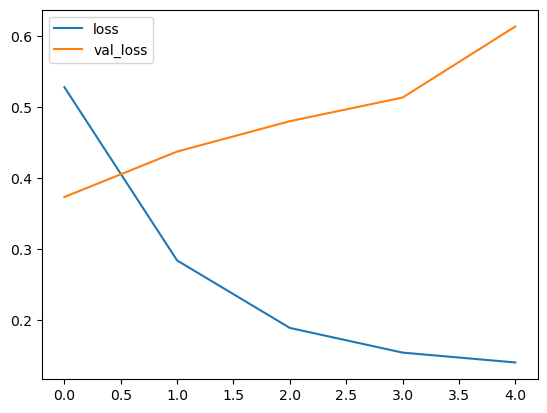

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [40]:
#testing
test_sentence1 = "I loved my journey on this flight."
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label: Good sentiment
Predicted label: Bad sentiment


'bad'

In [41]:
test_sentence1 = "tianbao."
predict_sentiment(test_sentence1)
test_sentence2 = "great!"
predict_sentiment(test_sentence2)

Predicted label: Bad sentiment
Predicted label: Good sentiment


'good'

In [42]:
test_sentence1 = "wonderful"
predict_sentiment(test_sentence1)
test_sentence2 = "horrible!"
predict_sentiment(test_sentence2)

Predicted label: Good sentiment
Predicted label: Bad sentiment


'bad'

In [43]:
test_sentence1 = "i wonderful it"
predict_sentiment(test_sentence1)
test_sentence2 = "worst!"
predict_sentiment(test_sentence2)

Predicted label: Good sentiment
Predicted label: Bad sentiment


'bad'